In [1]:
# Dependencies
import numpy as np
import datetime as dt
import pandas as pd
import matplotlib.pyplot as plt

# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func

In [2]:
engine = create_engine("sqlite:///hawaii.sqlite")

# reflect an existing database into a new model
base = automap_base()
# reflect the tables
base.prepare(engine, reflect=True)

# Save references to each table
measurement = base.classes.measurement
station = base.classes.station

In [3]:
# Create our session (link) from Python to the DB
session = Session(engine)

## D1: Determine the Summary Statistics for June

In [4]:
# 1. Import the sqlalchemy extract function and create a list
from sqlalchemy import extract
june_temps = []
# 2. Write a query that filters the Measurement 
    # table to retrieve the temperatures for the month of June. 
june_temps = session.query(measurement.date, measurement.tobs).\
    filter(extract('month', measurement.date)==6).all()
# print(june_temps)

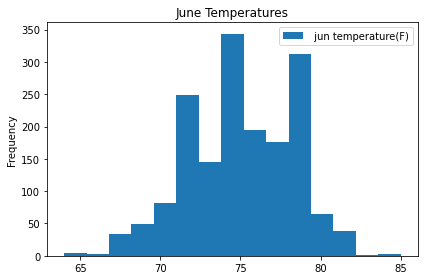

In [5]:
# 3. Create a DataFrame from the list of temperatures for the month of June. 
june_temps_df = pd.DataFrame(june_temps,columns=['date',' jun temperature(F)'])
# june_temps_df.head()
june_temps_df.plot.hist(bins=15)
plt.title("June Temperatures")
plt.tight_layout()

In [6]:
# 4. Calculate and print out the summary statistics for the June temperature DataFrame.
june_temps_df.describe()

,jun temperature(F)
count,1700.000000
mean,74.944118
std,3.257417
min,64.000000
25%,73.000000
50%,75.000000
75%,77.000000
max,85.000000


## D2: Determine the Summary Statistics for December

In [7]:
# 6. create a list and write a query that filters the Measurement table to retrieve the temperatures for the month of December.
dec_temps = []
dec_temps = session.query(measurement.date,measurement.tobs).\
    filter(extract('month',measurement.date)==12).all()
# print(dec_temps)
 

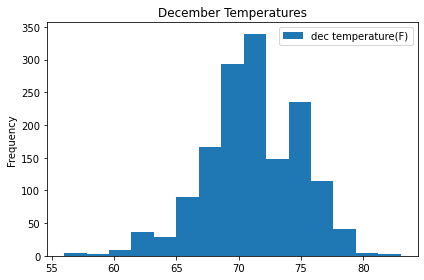

In [8]:
# 8. Create a DataFrame from the list of temperatures for the month of December. 
dec_temps_df = pd.DataFrame(dec_temps, columns=['date','dec temperature(F)'])
# dec_temps_df
dec_temps_df.plot.hist(bins=15)
plt.title("December Temperatures")
plt.tight_layout()

In [9]:
# 9. Calculate and print out the summary statistics for the Decemeber temperature DataFrame.
dec_temps_df.describe()

,dec temperature(F)
count,1517.000000
mean,71.041529
std,3.745920
min,56.000000
25%,69.000000
50%,71.000000
75%,74.000000
max,83.000000
